# Supplementary Figure 7

In [1]:
import os.path as op
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotutils

In [2]:
df_dir = op.join('..', 'data', 'dataframes')

In [3]:
plotutils.set_plot_style()

### Load dataframes

In [4]:
mod_df = pd.read_csv(op.join(df_dir, 'hierarchical_output.csv'))
params_mod = pd.read_csv(op.join(df_dir, 'hierarchical_fits.csv'))

### Supplementary Figure 7a

In [5]:
pal = ['#d95f02', '#e6a778']

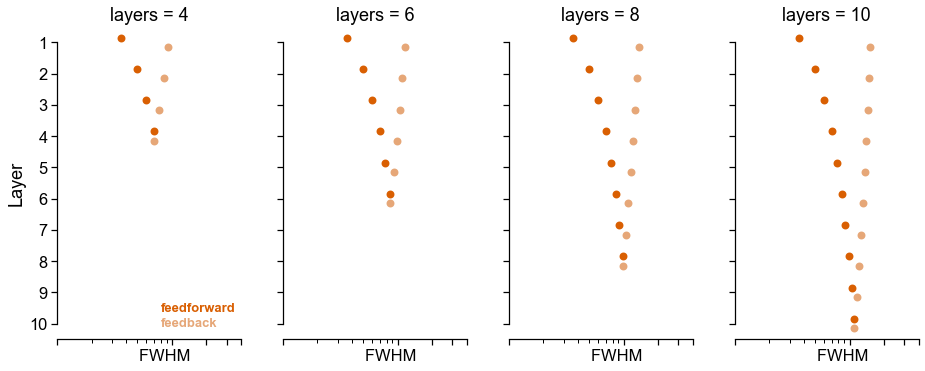

In [6]:
g = sns.catplot(x='fwhm_deg', y='layer', col='n_layers', 
                hue='model', hue_order=['forward', 'reverse'], palette=pal, 
                kind='point', dodge=.3, join=False, orient='h', height=5.5, 
                scale=.9, aspect=.6,  sharey=True, sharex=True, legend=False,
                data=params_mod.query("stim_size==15 & filter_sigma==15"))

g.axes[0][0].set_xscale('log')
plt.setp(g.axes[0][0].get_xminorticklabels(), visible=False)

g.set(xticks=[10, 100, 200, 300, 400], xticklabels=["", "FWHM   ", "", "", ""], xlabel='')
g.set(ylim=[9.5, -.5])
g.set_ylabels('Layer')
g.set_titles("layers = {col_name}")

g.axes[0][0].text(80, 8.6, 'feedforward', fontsize=13, fontweight='demibold', c=pal[0])
g.axes[0][0].text(80, 9.1, 'feedback', fontsize=13, fontweight='demibold', c=pal[1])
sns.despine(trim=True)
plt.gcf().tight_layout(w_pad=2)

### Supplementary Figure 7b

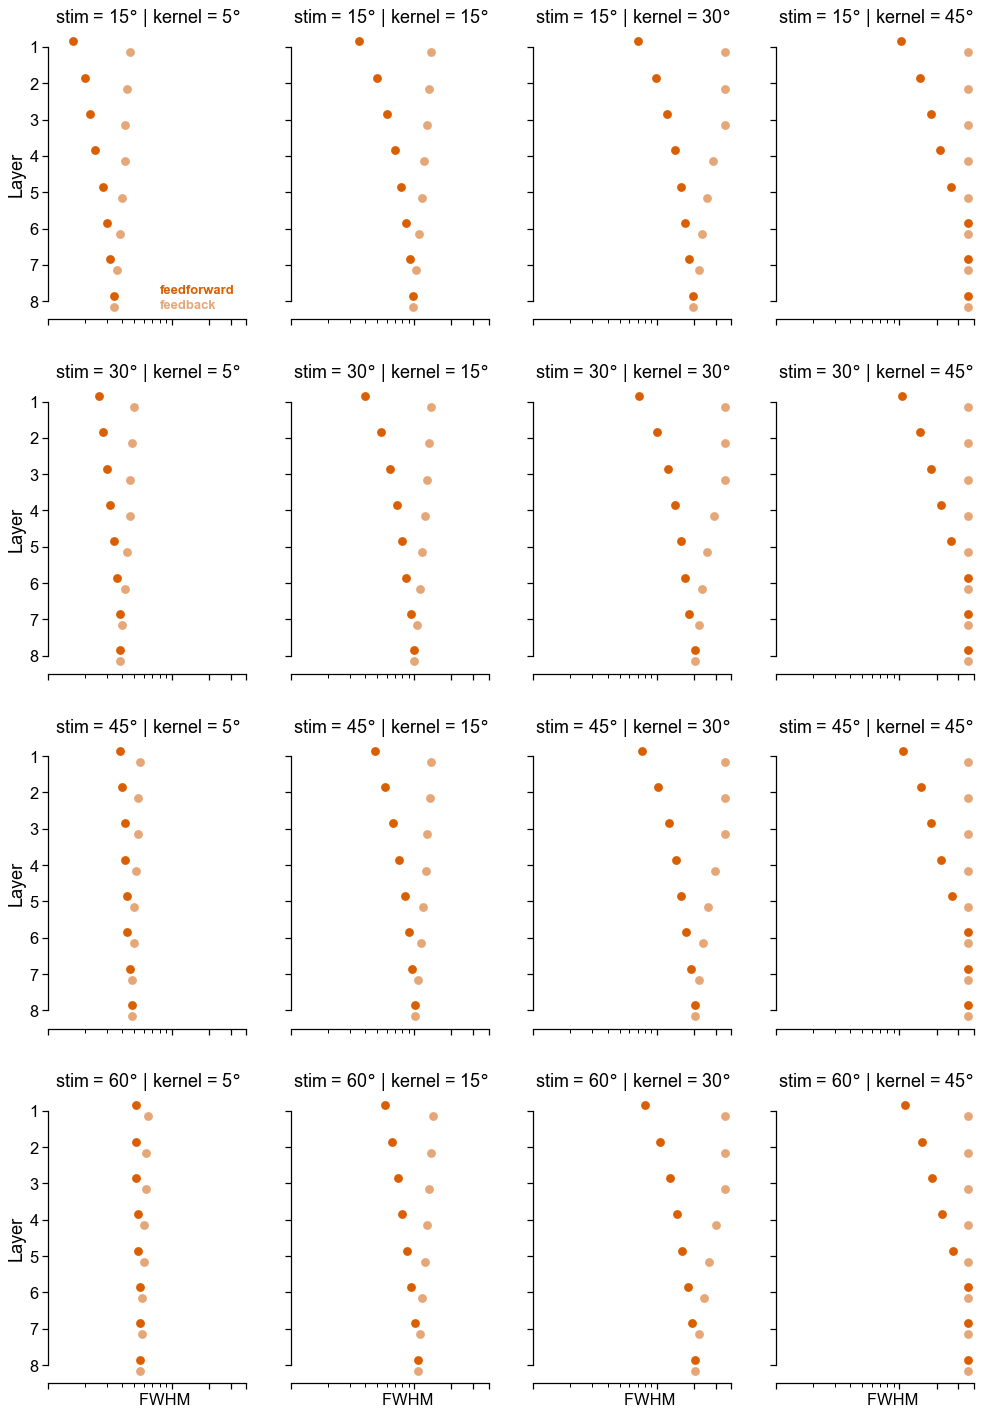

In [7]:
g = sns.catplot(x='fwhm_deg', y='layer', col='filter_sigma', row='stim_size',
                hue='model', hue_order=['forward', 'reverse'], palette=pal, 
                kind='point', dodge=.3, join=False, orient='h', height=5, 
                aspect=.7,  sharey=True, sharex=True, legend=False,
                data=params_mod.query("n_layers==8"))

g.axes[0][0].set_xscale('log')
plt.setp(g.axes[0][0].get_xminorticklabels(), visible=False)

g.set(xticks=[10, 100, 200, 300, 400], xticklabels=["", "FWHM   ", "", "", ""], xlabel='')
g.set(ylim=[7.5, -.5])
g.set_ylabels('Layer')
g.set_titles(row_template="stim = {row_name}$\\degree$", col_template="kernel = {col_name}$\\degree$")

g.axes[0][0].text(80, 6.8, 'feedforward', fontsize=13, fontweight='demibold', c=pal[0])
g.axes[0][0].text(80, 7.2, 'feedback', fontsize=13, fontweight='demibold', c=pal[1])
sns.despine(trim=True)
plt.gcf().tight_layout(h_pad=2, w_pad=2)